In [2]:
import collections

def slide(infile,outfile,window_size):
    queue=collections.deque(maxlen=window_size)
    line=infile.readline()
    headers=[s.strip() for s in line.split("|")]
    row=[headers[0]]
    for h in headers[1:]:
        for i in reversed(range(window_size)):
            row.append("%s-%i"%(h,i))
    outfile.write(" | ".join(row))
    outfile.write("\n")
    for line in infile:
        queue.append(line.split())
        if len(queue)==window_size:
            row=[queue[-1][0]]
            for j in range(1,len(headers)):
                for old in queue:
                    row.append(old[j])
            outfile.write("\t".join(row))
            outfile.write("\n")

In [5]:
ws=10
with open("Feature/feature_tt1.csv","r") as inf:
    with open("Feature/windowdemo.csv","w") as outf:
        slide(inf,outf,ws)

In [3]:
import csv
import collections

def slide1(infile,outfile,window_size):
    r=csv.reader(infile)
    w=csv.writer(outfile)
    queue=collections.deque(maxlen=window_size)
    headers=next(r) # r.next() on python 2
    l=[headers[0]]
    for h in headers[1:]:
        for i in reversed(range(window_size)):
            l.append("%s-%i"%(h,i))
    w.writerow(l)
    hrange=range(1,len(headers))
    for row in r:
        queue.append(row)
        if len(queue)==window_size:
            l=[queue[-1][0]]
            for j in hrange:
                for old in queue:
                    l.append(old[j])
            w.writerow(l)

In [4]:
ws=5
with open("Feature/feature_tt1.csv","r") as inf:
    with open("Feature/window_stat.csv","w") as outf:
        slide1(inf,outf,ws)

In [1]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Feature/window_stat.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

x = train.drop("Level", axis=1)
y = train["Level"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)
#print(x_test)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
9,SGDClassifier,0.9000,0.8889
6,LogisticRegressionCV,1.0000,0.8148
16,LinearSVC,1.0000,0.7778
7,PassiveAggressiveClassifier,0.9875,0.7778
12,GaussianNB,0.9125,0.7778
1,BaggingClassifier,1.0000,0.7037
10,Perceptron,0.8375,0.6296
2,ExtraTreesClassifier,1.0000,0.6296
13,KNeighborsClassifier,0.7750,0.6296
4,RandomForestClassifier,1.0000,0.5926


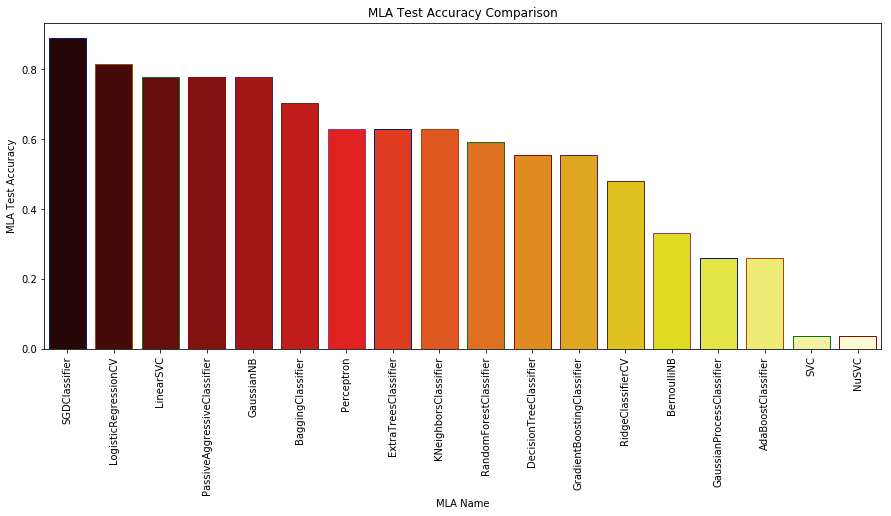

In [11]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()